<a href="https://colab.research.google.com/github/qudseen/BWH1_SPINE-/blob/main/Copy_of_CS666_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

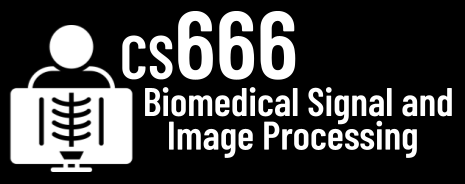
#Assignment 2

In [42]:
### TODO:Qudseen

In [1]:
%pylab inline
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
# we will be using the EEG/MEG analysis library MNE
# documentation is available here: https://mne.tools/stable/index.html
!pip install -U mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 44.0 MB/s eta 0:00:00


In [3]:
import mne # let's import MNE

# .. and the sample dataset
from mne.datasets import sample

# These data were acquired with the Neuromag Vectorview system at 
# MGH/HMS/MIT Athinoula A. Martinos Center Biomedical Imaging. 
# EEG data from an electrode cap was acquired simultaneously with the MEG. 

### EXPERIMENT DESCRIPTION ###
# In this experiment, checkerboard patterns were presented to the subject into
# the left and right visual field, interspersed by tones to the left or right ear.
# The interval between the stimuli was 750 ms. Occasionally a smiley face was 
# presented at the center of the visual field. The subject was asked to press a 
# key with the right index finger as soon as possible after the appearance of the face.

In [4]:
# and let's load it!
data_path = sample.data_path()
raw = mne.io.read_raw_fif(os.path.join(data_path,'MEG/sample/sample_audvis_raw.fif'))

Using default location ~/mne_data for sample...
Creating ~/mne_data


100%|██████████████████████████████████████| 1.65G/1.65G [00:00<00:00, 271GB/s]
Untarring contents of '/root/mne_data/MNE-sample-data-processed.tar.gz' to '/root/mne_data'


Attempting to create new mne-python configuration file:
/root/.mne/mne-python.json
Opening raw data file /root/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.


**Task 1:** Analyze the data. [20 Points]


In [43]:
raw.info

<Info | 21 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 description: acquisition (megacq) VectorView system at NMR-MGH
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 events: 1 item (list)
 experimenter: MEG
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 172.2 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 proj_id: 1 item (ndarray)
 proj_name: test
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off
 sfreq: 600.6 Hz
>

In [44]:
raw


<Raw | sample_audvis_raw.fif, 376 x 166800 (277.7 s), ~3.3 MB, data not loaded>

In [45]:
# How many EEG channels were used when acquiring the data? 
# Hint: You can use raw.info or raw.ch_names to figure this out!
# TODO: 60

In [46]:
# TODO What is the sampling frequency of this data?
# TODO: 600.61 Hz

In [47]:
# TODO What is the total duration of the measurement?
# TODO: 4 minutes 38 seconds

**Task 2:** Let's look at some channels! [20 Points]

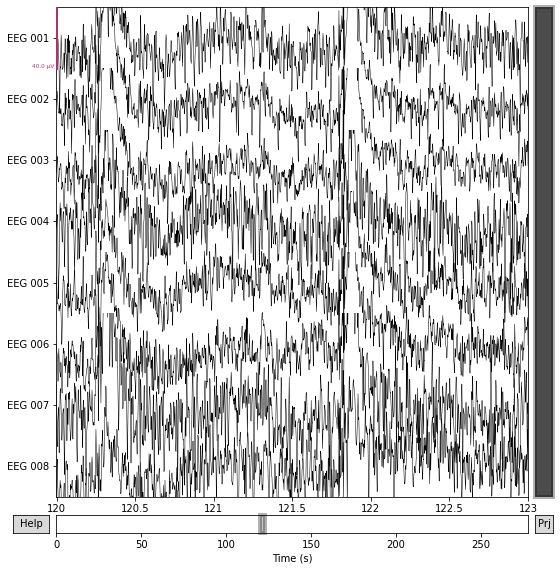

In [48]:
# the code below plots EEG channels 1-8 for 3 seconds after 2 minutes
chs = ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 005', 'EEG 006', 'EEG 007', 'EEG 008']
chan_idxs = [raw.ch_names.index(ch) for ch in chs]
ecg1to8 = raw.plot(order=chan_idxs, start=120, duration=3)

In [49]:
# TODO please plot EEG channels 50-60 for 1 second after 151 seconds.

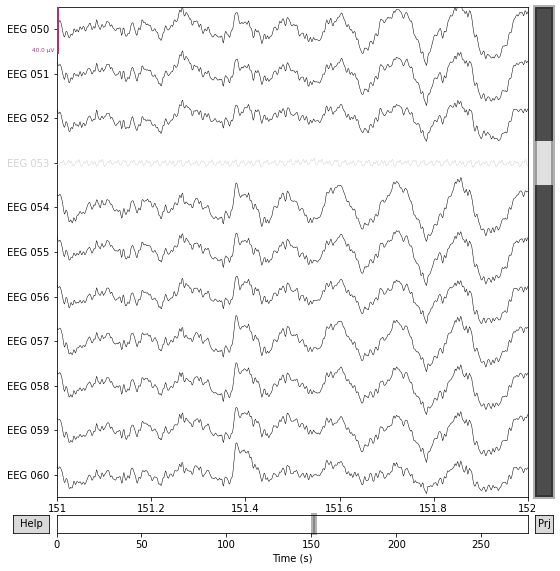

In [50]:
chs = ['EEG 050', 'EEG 051', 'EEG 052', 'EEG 053', 'EEG 054', 'EEG 055', 'EEG 056', 'EEG 057' , 'EEG 058' , 'EEG 059' , 'EEG 060']
chan_idxs = [raw.ch_names.index(ch) for ch in chs]
ecg50to60 = raw.plot(order=chan_idxs, start=151, duration=1)

In [ ]:
# TODO: Do you see a bad channel? If yes, which one?
# TODO: EEG 053

**Task 3:** How long between event and brain activity? [25 Points]

/usr/local/lib/python3.8/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


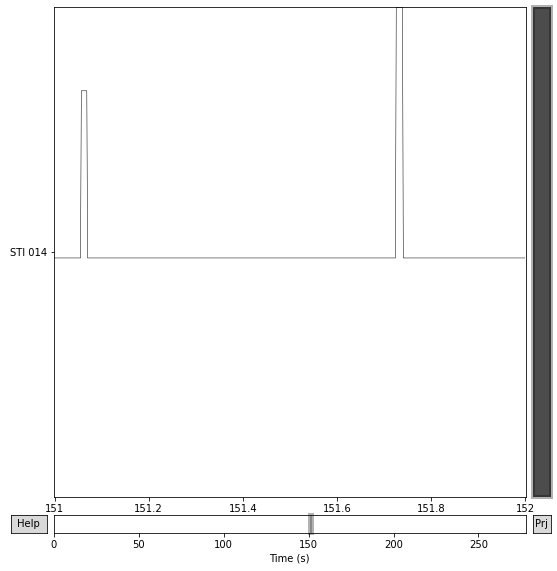

In [ ]:
# the following code plots the stimulus channel for the same time
chan_idxs = [raw.ch_names.index('STI 014')]
stim = raw.plot(order=chan_idxs, start=151, duration=1)

In [ ]:
# TODO Please combine the last two plots into one.
# the plot should show EEG channels 50-60 and the stimulus channel together.

320 events found
Event IDs: [ 1  2  3  4  5 32]


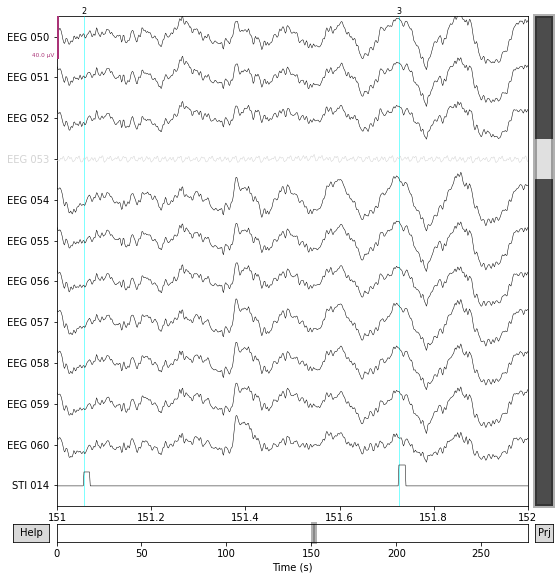

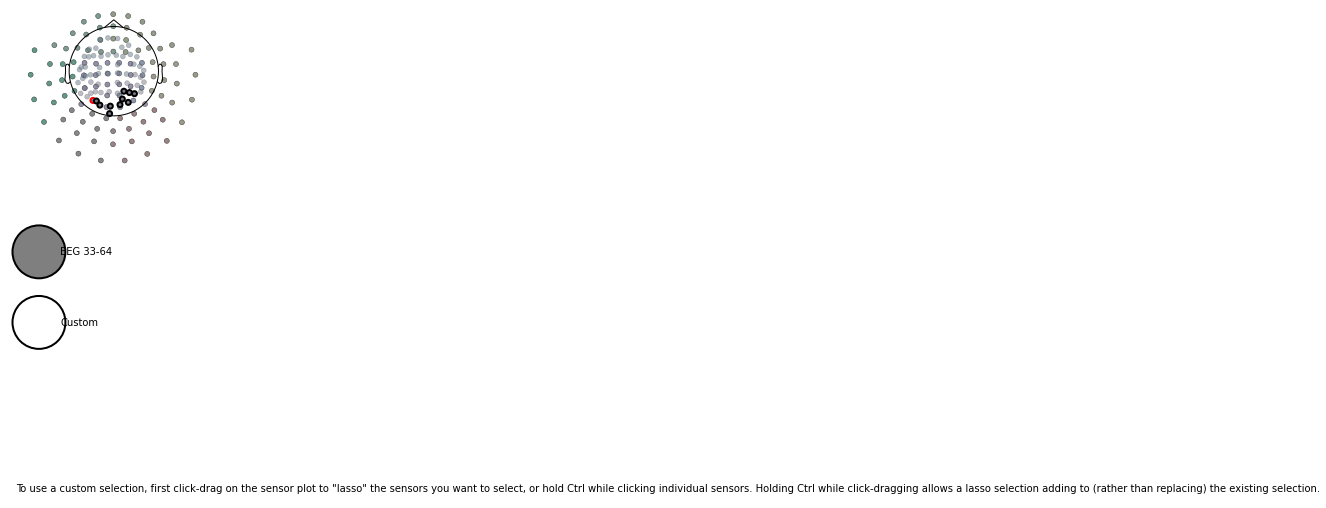

In [51]:
chs = ['EEG 050', 'EEG 051', 'EEG 052', 'EEG 053', 'EEG 054', 'EEG 055', 'EEG 056', 'EEG 057' , 'EEG 058' , 'EEG 059' , 'EEG 060']
chan_idxs = [raw.ch_names.index(ch) for ch in chs]
chan_idxs1 = [raw.ch_names.index('STI 014')]
output=raw.plot(events = mne.find_events(raw, stim_channel='STI 014'),order= chan_idxs1 and chan_idxs,start=151, duration=1,group_by="selection")

In [ ]:
# TODO How many stimulus events do you observe?
# TODO: 320

In [52]:
events = mne.find_events(raw, stim_channel='STI 014')
print(events[1])

320 events found
Event IDs: [ 1  2  3  4  5 32]
[28345     0     3]


In [ ]:
# TODO Please estimate the time between the first stimulus and brain activity response.
# TODO: 0.08sec

**Task 4:** Localize different brain waves for different stimuli! [35 Points]

In [7]:
# the following code groups all stimuli together
# and allows the visualization of average brain activity per stimuli.
events = mne.find_events(raw, stim_channel='STI 014')
event_dict = {'auditory/left': 1, 
              'auditory/right': 2, 
              'visual/left': 3,
              'visual/right': 4, 
              'face': 5, 
              'button': 32}

picks = mne.pick_types(raw.info, eeg=True)

epochs = mne.Epochs(raw, events, event_id=event_dict, picks=picks,
                    preload=True)

320 events found
Event IDs: [ 1  2  3  4  5 32]
Not setting metadata
320 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] sec
Applying baseline correction (mode: mean)
3 projection items activated
Loading data for 320 events and 421 original time points ...
0 bad epochs dropped


    Using multitaper spectrum estimation with 7 DPSS windows


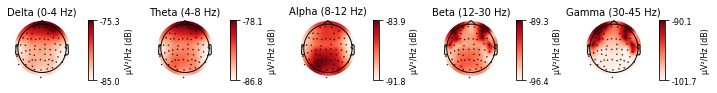

In [ ]:
# here we see the average localized brain activity for the right visual stimuli
visual_activity = epochs['visual/right'].plot_psd_topomap()

    Using multitaper spectrum estimation with 7 DPSS windows


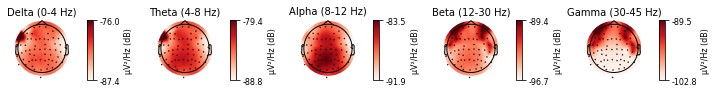

In [ ]:
# here we see the average localized brain activity for the shown 'face'
face_activity = epochs['face'].plot_psd_topomap()

In [ ]:
# TODO Please visualize the average brain activity when the subject pushes the button

NOTE: plot_psd_topomap() is a legacy function. New code should use .compute_psd().plot_topomap().
    Using multitaper spectrum estimation with 7 DPSS windows


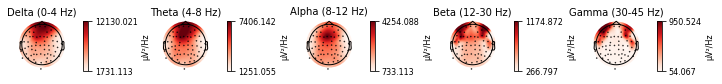

In [8]:
button_activity = epochs['button'].plot_psd_topomap()

In [ ]:
# TODO Which difference do you see between the visual/right, the face, and the button event?
# TODO Which brain region seems active during the button event?
# Hint: visual/right and face seem more similar to the button event. Think about why?
# TODO:Frontal region seems to be more active during button event.This frontal activity pattern seems to be the case even during resting state unlike visual/right and face eventy.

**Bonus Task:** What type of event happened in Task 3? [33 Points]

In [ ]:
# TODO Please go back to Task 3. Can you figure out which event types happened?

<Annotations | 320 segments: 1 (72), 2 (73), 3 (73), 32 (16), 4 (71), 5 (15)>


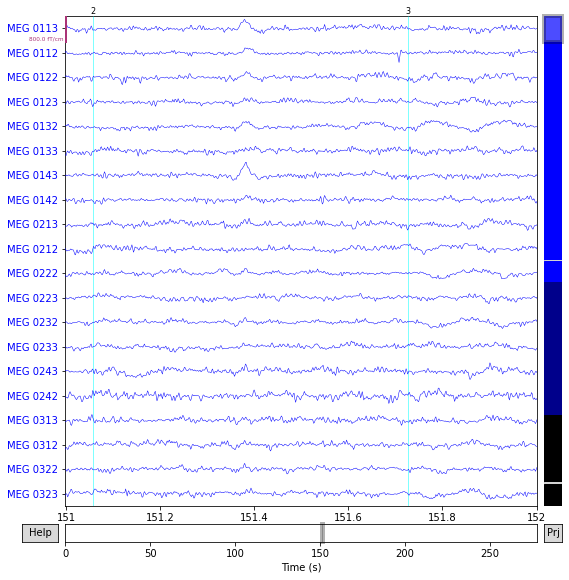

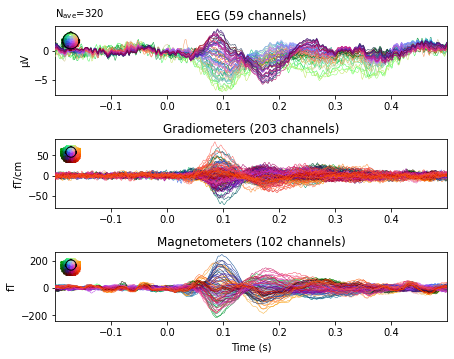

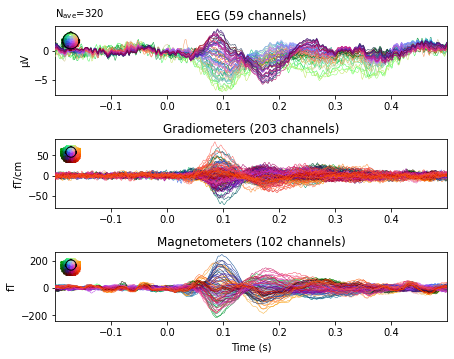

In [41]:
types=mne.annotations_from_events(events=events,sfreq=600.61)
print(types)
Epochs=mne.Epochs(raw,events=events)
out=Epochs.average()
out.plot()
raw.plot(events=events,start=151,duration=1)
out.plot()

In [ ]:
# You did it!!
#
# ┈┈┈┈┈┈▕▔╲
# ┈┈┈┈┈┈┈▏▕
# ┈┈┈┈┈┈┈▏▕▂▂▂
# ▂▂▂▂▂▂╱┈▕▂▂▂▏
# ▉▉▉▉▉┈┈┈▕▂▂▂▏
# ▉▉▉▉▉┈┈┈▕▂▂▂▏
# ▔▔▔▔▔▔╲▂▕▂▂|
#